![Prodigy_ML/image.png](image.png)

---
# Cats vs Dogs Classification

This project aims to classify images of cats and dogs using machine learning techniques. The notebook provides a comprehensive walkthrough of the process, including data extraction, preprocessing, model training, and evaluation.

## Table of Contents
- [Installation](#installation)
- [Usage](#usage)
- [Project Structure](#project-structure)
- [Data](#data)
- [Model](#model)
- [Results](#results)

## Installation

To run this project, you need to have Python and the necessary libraries installed. 

## Usage

To use this project, follow these steps:


1. Extract the datasets (assuming you have the zip files in the `data/input` directory):
    ```bash
    # Extract the training data
    unzip data/input/dogs-vs-cats/train.zip -d data/working/train

    # Extract the test data
    unzip data/input/dogs-vs-cats/test1.zip -d data/working/test
    ```

2. Run the Jupyter notebook:
    ```bash
    jupyter notebook Cats_vs_Dogs.ipynb
    ```

## Project Structure

The project structure is as follows:

```
Prodigy_ML/
├── data/
│   ├── input/
│   │   ├── dogs-vs-cats/
│   │   │   ├── train.zip
│   │   │   ├── test1.zip
│   ├── working/
│       ├── train/
│       │   ├── train/
│       ├── test/
│           ├── test1/
├── Cats_vs_Dogs.ipynb

```

## Data

The data used in this project is sourced from the [Kaggle Dogs vs. Cats dataset](https://www.kaggle.com/c/dogs-vs-cats/data). Ensure you have downloaded and placed the dataset in the `data/input` directory.

## Model

The project uses a Convolutional Neural Network (CNN) to classify images of cats and dogs. The model is built using TensorFlow and Keras libraries.

### Steps:
1. **Importing Required Libraries**: Libraries like NumPy, Pandas, OpenCV, TensorFlow, and Keras are imported.
2. **Extracting the Datasets**: The dataset zip files are extracted to the working directory.
3. **Setting up Paths**: Paths to the training and test directories are set up.
4. **Loading and Preprocessing Images**: Functions are defined to load and preprocess images, resizing them to 64x64 pixels.
5. **Visualizing Images**: A function to visualize images along with their labels is provided.

## Results

The results of the model are evaluated using accuracy, precision, recall, and F1 score. Visualization of the training and validation loss and accuracy is also provided.


## Dataset Description

The training archive contains 25,000 images of dogs and cats. Train your algorithm on these files and predict the labels for test1.zip (1 = dog, 0 = cat).

### A note on hand labeling
Per the rules and spirit of this contest, please do not manually label your submissions. We work hard to fair and fun contests, and ask for the same respect in return.

---

 # Importing Required libraries

In [122]:
import numpy as np
import pandas as pd
import os
import zipfile
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tqdm import tqdm
import plotly.express as px
import random
from PIL import Image
import plotly.graph_objects as go
for dirname, _, filenames in os.walk('data/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/input\dogs-vs-cats\sampleSubmission.csv
data/input\dogs-vs-cats\test1.zip
data/input\dogs-vs-cats\train.zip


# Extracting the datasets

In [166]:
with zipfile.ZipFile('data/input/dogs-vs-cats/train.zip', 'r') as zip_ref:
    zip_ref.extractall('data/working/train')
with zipfile.ZipFile('data/input/dogs-vs-cats/test1.zip', 'r') as zip_ref:
    zip_ref.extractall('data/working/test')

# Setting up paths

In [168]:
train_dir = 'data/working/train/train'
test_dir = 'data/working/test/test1'

# Function to load and preprocess the images

In [170]:
def load_images(folder, img_size=(64, 64), sample_count=20, label_filter=None):
    images = []
    labels = []
    filenames = os.listdir(folder)

    if label_filter is not None:
        filenames = [fname for fname in filenames if label_filter in fname]

    random.shuffle(filenames)
    for img in filenames[:sample_count]:
        try:
            img_path = os.path.join(folder, img)
            img_pil = Image.open(img_path)
            img_pil = img_pil.resize(img_size)
            img_np = np.array(img_pil) / 255.0  # Normalize pixel values
            images.append(img_np)
            labels.append(0 if 'cat' in img else 1)
        except Exception as e:
            print(f"Error loading image {img}: {e}")

    return np.array(images), np.array(labels)

# Visualize images with labels

In [172]:
def visualize_images(images, labels, sample_count=20):
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))
    axes = axes.flatten()

    for i in range(sample_count):
        axes[i].imshow(images[i])
        axes[i].set_title('Cat' if labels[i] == 0 else 'Dog')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Load and visualize cat images

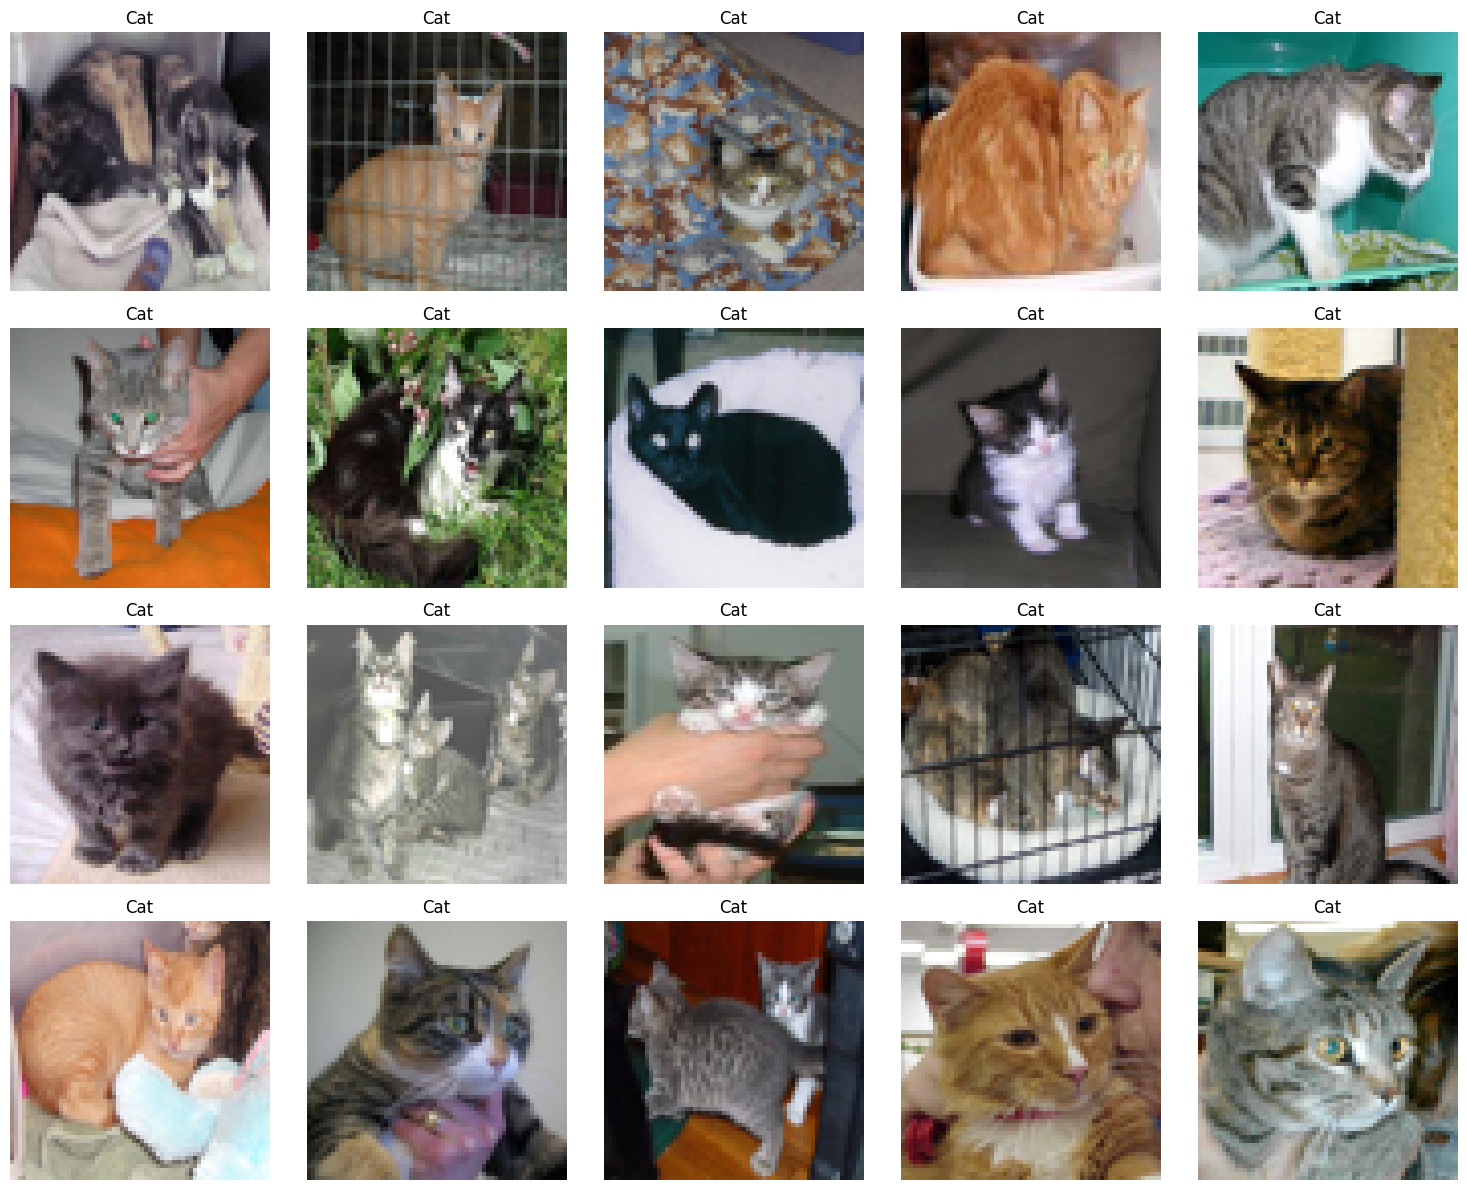

In [174]:
cat_images, cat_labels = load_images(train_dir, sample_count=20, label_filter='cat')
visualize_images(cat_images, cat_labels, sample_count=20)

# Load and visualize dog images

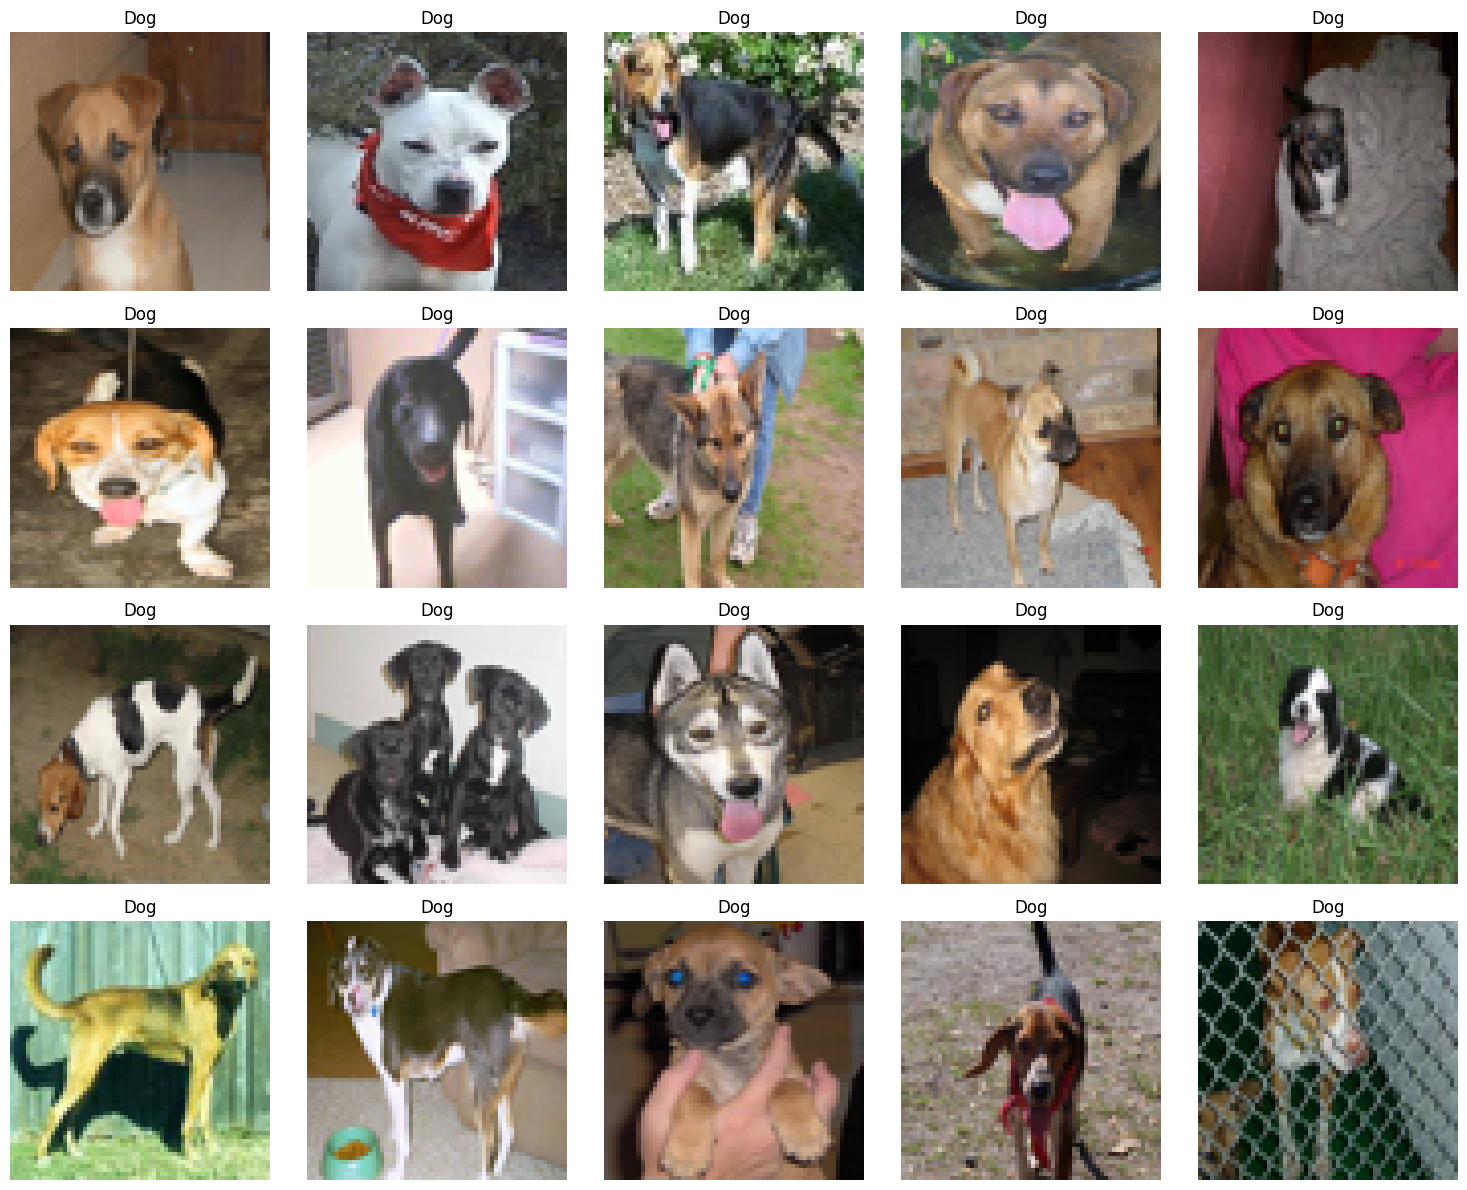

In [176]:
dog_images, dog_labels = load_images(train_dir, sample_count=20, label_filter='dog')
visualize_images(dog_images, dog_labels, sample_count=20)

# Load and visualize both cat and dog images

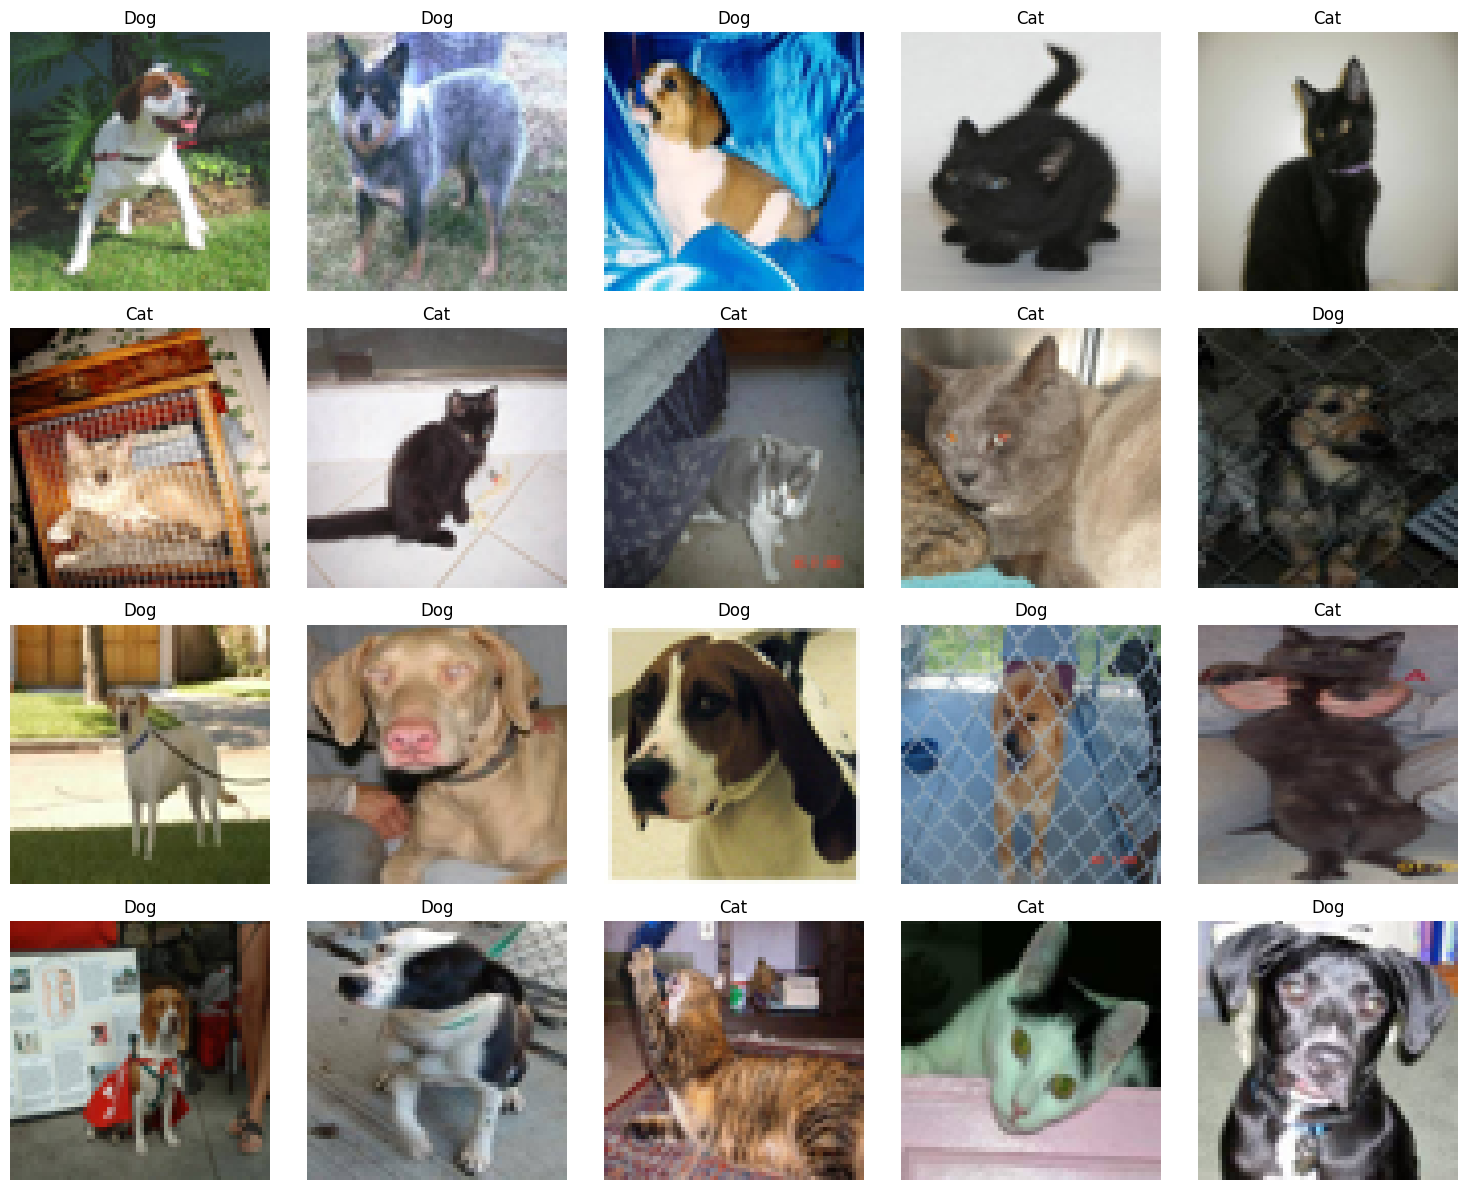

In [178]:
all_images, all_labels = load_images(train_dir, sample_count=20)
visualize_images(all_images, all_labels, sample_count=20)

# Loading and preprocessing the training data

In [180]:
images, labels = load_images(train_dir, sample_count=1000)
images = images / 255.0

# Display the shape of the images array

In [182]:
print("Shape of images array:", images.shape)

Shape of images array: (1000, 64, 64, 3)


# Display the shape of the first image

In [184]:
print("Shape of the first image:", images[0].shape)

Shape of the first image: (64, 64, 3)


 # Display the first 2 images

In [186]:
print(images[:2])
print(labels[:2])

[[[[2.86043829e-03 3.06036140e-03 3.30642061e-03]
   [2.86043829e-03 3.06036140e-03 3.32179931e-03]
   [2.73740869e-03 2.93733180e-03 3.19876970e-03]
   ...
   [1.47635525e-03 1.21491734e-03 4.15224913e-04]
   [1.59938485e-03 1.36870434e-03 3.84467512e-04]
   [1.56862745e-03 1.33794694e-03 3.38331411e-04]]

  [[3.04498270e-03 3.24490581e-03 3.49096501e-03]
   [2.93733180e-03 3.13725490e-03 3.38331411e-03]
   [2.70665129e-03 2.90657439e-03 3.15263360e-03]
   ...
   [1.49173395e-03 1.23029604e-03 4.30603614e-04]
   [1.61476355e-03 1.38408304e-03 3.99846213e-04]
   [1.59938485e-03 1.36870434e-03 3.69088812e-04]]

  [[2.84505959e-03 3.01422530e-03 3.24490581e-03]
   [3.13725490e-03 3.30642061e-03 3.52172241e-03]
   [2.81430219e-03 2.98346790e-03 3.19876970e-03]
   ...
   [1.50711265e-03 1.23029604e-03 4.15224913e-04]
   [1.63014225e-03 1.39946175e-03 3.99846213e-04]
   [1.59938485e-03 1.36870434e-03 3.69088812e-04]]

  ...

  [[5.69011918e-04 3.69088812e-04 2.30680507e-04]
   [1.35332564e-

# Flattening the images for the SVM input

In [188]:
n_samples, img_height, img_width, img_channels = images.shape
images_flat = images.reshape(n_samples, -1)

# Standardizing the features

In [190]:
scaler = StandardScaler()
images_flat_scaled = scaler.fit_transform(images_flat)

# Applying t-SNE

In [192]:
perplexity = min(30, n_samples - 1)
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
images_tsne = tsne.fit_transform(images_flat_scaled)

# Splitting the dataset into training and test sets

In [194]:
X_train, X_val, y_train, y_val = train_test_split(images_flat_scaled, labels, test_size=0.2, random_state=42)

In [195]:
X_train

array([[ 1.14735237,  0.36989021,  0.22797849, ...,  1.46120111,
         1.42560256,  1.20618153],
       [-0.24786456, -0.23855166,  0.04475003, ..., -0.15432612,
         0.2215589 ,  0.55598006],
       [-1.52918622, -1.39883616, -1.32241621, ...,  1.12944105,
        -1.1608616 , -1.62580712],
       ...,
       [-0.94547302, -0.96019202, -0.87139229, ..., -0.83227059,
        -0.90816108, -0.83111642],
       [ 0.47821772,  0.45478907,  0.67900241, ...,  0.39379919,
         0.17696469,  0.07916564],
       [ 0.54940226,  0.46893889, -0.44855738, ...,  1.40350371,
         1.78235623,  1.4518132 ]])

In [196]:
X_val

array([[-1.24444807, -0.94604221, -0.40627388, ...,  0.49476964,
         0.37020626,  0.07916564],
       [-0.19091693, -0.42249921, -0.75863632, ...,  0.26398004,
         0.17696469,  0.00692103],
       [-1.17326354, -0.77624448, -1.01233727, ...,  0.59574009,
         0.78641889,  0.00692103],
       ...,
       [ 0.77719277,  0.99248189,  1.28506579, ..., -0.47166183,
        -0.81897266, -0.59993368],
       [-0.46141817, -0.59229694, -0.70225833, ..., -0.24087223,
        -0.12033004, -0.65772936],
       [ 0.52092844,  0.3557404 , -0.50493536, ..., -1.3226985 ,
        -1.36896791, -1.51021574]])

In [197]:
X_val

array([[-1.24444807, -0.94604221, -0.40627388, ...,  0.49476964,
         0.37020626,  0.07916564],
       [-0.19091693, -0.42249921, -0.75863632, ...,  0.26398004,
         0.17696469,  0.00692103],
       [-1.17326354, -0.77624448, -1.01233727, ...,  0.59574009,
         0.78641889,  0.00692103],
       ...,
       [ 0.77719277,  0.99248189,  1.28506579, ..., -0.47166183,
        -0.81897266, -0.59993368],
       [-0.46141817, -0.59229694, -0.70225833, ..., -0.24087223,
        -0.12033004, -0.65772936],
       [ 0.52092844,  0.3557404 , -0.50493536, ..., -1.3226985 ,
        -1.36896791, -1.51021574]])

In [198]:
y_val

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1])

# Checking class distribution

In [200]:
unique, counts = np.unique(labels, return_counts=True)
print(f"Class distribution: {dict(zip(unique, counts))}")

Class distribution: {0: 495, 1: 505}


In [ ]:
def plot_tsne_data(tsne_data, labels, title):
    df_tsne = pd.DataFrame()
    df_tsne['X'] = tsne_data[:, 0]
    df_tsne['Y'] = tsne_data[:, 1]
    df_tsne['Label'] = labels
    df_tsne['Label'] = df_tsne['Label'].map({0: 'Cat', 1: 'Dog'})

    fig = px.scatter(df_tsne, x='X', y='Y', color='Label', title=title)
    fig.show()

plot_tsne_data(images_tsne, labels, 't-SNE visualization of Cats vs Dogs')

# Training the SVM model

In [203]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

# Making predictions on the validation set

In [205]:
y_val_pred = svm.predict(X_val)

In [206]:
y_val_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0])

# Evaluating the model

In [208]:
val_accuracy = accuracy_score(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred, target_names=['Cat', 'Dog'])
val_conf_matrix = confusion_matrix(y_val, y_val_pred)

# Accuracy

In [210]:
print(f'Validation Accuracy: {val_accuracy:.4f}')

Validation Accuracy: 0.4900


# Classification Report

In [212]:
print('Validation Classification Report:')
print(val_class_report)

Validation Classification Report:
              precision    recall  f1-score   support

         Cat       0.48      0.49      0.48        98
         Dog       0.50      0.49      0.50       102

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



# Confusion Matrix

Validation Confusion Matrix:
[[48 50]
 [52 50]]


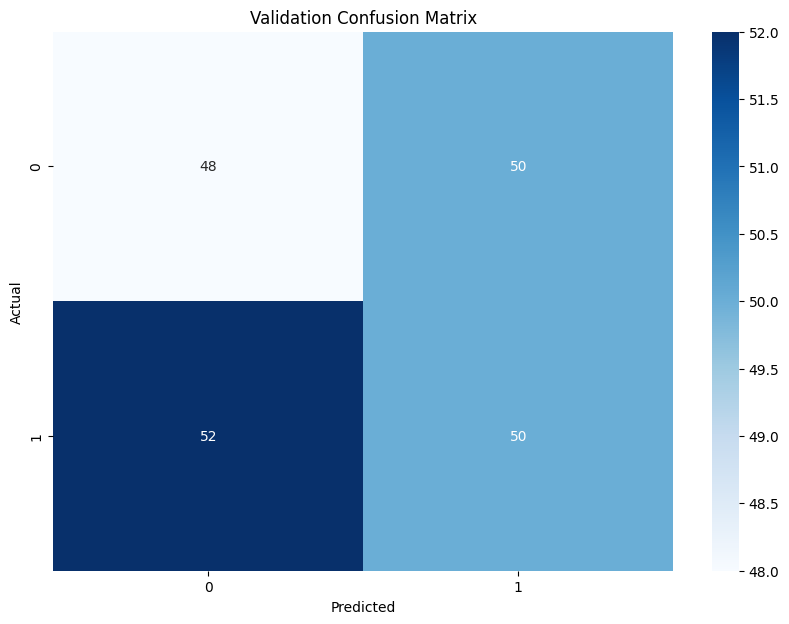

In [214]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
print('Validation Confusion Matrix:')
print(val_conf_matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Validation Confusion Matrix')
plt.show()


# Saving the SVM model and scaler

In [216]:
import pickle
with open('data/working/svm_model.pkl', 'wb') as f:
    pickle.dump(svm, f)
with open('data/working/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Loading and preprocessing the test data

In [218]:
test_images, test_labels = load_images(test_dir)
test_images = test_images / 255.0

# Flattening the test images for the SVM input

In [220]:
n_test_samples, test_img_height, test_img_width, test_img_channels = test_images.shape
test_images_flat = test_images.reshape(n_test_samples, -1)
test_images_flat_scaled = scaler.transform(test_images_flat)

# Standardizing the test features

In [222]:
test_images_flat_scaled = scaler.transform(test_images_flat)

# Applying t-SNE for visualization on test data

In [224]:
# Determine a new perplexity value for the test data
test_perplexity = min(30, n_test_samples - 1)

# Create a new t-SNE instance for the test data
test_tsne = TSNE(n_components=2, perplexity=test_perplexity, random_state=42)
test_images_tsne = test_tsne.fit_transform(test_images_flat_scaled)

# Making predictions on the test set

In [226]:
y_test_pred = svm.predict(test_images_flat_scaled)

In [227]:
y_test_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

# Creating a DataFrame for Plotly

In [229]:
df_test_tsne = pd.DataFrame()
df_test_tsne['X'] = test_images_tsne[:, 0]
df_test_tsne['Y'] = test_images_tsne[:, 1]
df_test_tsne['Predicted Label'] = y_test_pred
df_test_tsne['Predicted Label'] = df_test_tsne['Predicted Label'].map({0: 'Cat', 1: 'Dog'})


# Plotting with Plotly

In [231]:
fig = px.scatter(df_test_tsne, x='X', y='Y', color='Predicted Label', title='t-SNE visualization of Test Data Predictions')
fig.show()

# Visualizing some of the test results with Plotly

In [233]:
def plot_test_samples(images, tsne_data, predictions, sample_count=10):
    sample_indices = np.random.choice(range(len(images)), sample_count, replace=False)
    sample_images = images[sample_indices]
    tsne_samples = tsne_data[sample_indices]
    pred_samples = predictions[sample_indices]

    fig = px.scatter(tsne_samples, x=tsne_samples[:, 0], y=tsne_samples[:, 1], color=pred_samples.astype(str),
                     title="Test Data Predictions (t-SNE Space)")
    fig.show()

plot_test_samples(test_images, test_images_tsne, y_test_pred)

# Saving the test predictions to a CSV file

In [235]:
test_predictions = pd.DataFrame({'Id': np.arange(1, n_test_samples + 1), 'Label': y_test_pred})
test_predictions['Label'] = test_predictions['Label'].map({0: 'Cat', 1: 'Dog'})
test_predictions.to_csv('data/working/test_predictions.csv', index=False)

In [236]:
def plot_samples(tsne_data, y_true, y_pred, sample_count=10):
    sample_indices = np.random.choice(range(len(tsne_data)), sample_count, replace=False)
    tsne_samples = tsne_data[sample_indices]
    y_true_samples = y_true[sample_indices]
    y_pred_samples = y_pred[sample_indices]

    df_tsne_samples = pd.DataFrame()
    df_tsne_samples['X'] = tsne_samples[:, 0]
    df_tsne_samples['Y'] = tsne_samples[:, 1]
    df_tsne_samples['True Label'] = y_true_samples
    df_tsne_samples['Predicted Label'] = y_pred_samples
    df_tsne_samples['True Label'] = df_tsne_samples['True Label'].map({0: 'Cat', 1: 'Dog'})
    df_tsne_samples['Predicted Label'] = df_tsne_samples['Predicted Label'].map({0: 'Cat', 1: 'Dog'})

    fig = px.scatter(df_tsne_samples, x='X', y='Y', color='True Label', symbol='Predicted Label', title="True vs Predicted Labels (t-SNE Space)")
    fig.show()

# Apply t-SNE to the validation data
val_tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
val_images_tsne = val_tsne.fit_transform(X_val)

# Plot true vs predicted labels for the validation set
plot_samples(val_images_tsne, y_val, y_val_pred)


![Prodigy_ML/khush.png](khush.png)